In [3]:
 !git clone https://gitlab.com/lambda-hse/gans_coursera_public
%cd gans_coursera_public
from grading import Grader
parts = ['jVFC7', 'Rv1wq', 'q2JU7']
grader = Grader('6-2EkUahSs6zHJ-uAepHzw', parts)

Cloning into 'gans_coursera_public'...
remote: Enumerating objects: 88, done.
remote: Total 88 (delta 0), reused 0 (delta 0), pack-reused 88
Receiving objects: 100% (88/88), 6.35 MiB | 8.91 MiB/s, done.
Resolving deltas: 100% (23/23), done.
/content/gans_coursera_public


In [11]:
COURSERA_EMAIL, COURSERA_TOKEN = ???, ??? # Paste your email and submission token from assignment page here

SyntaxError: ignored

# Section 2. Distances between distributions

In [1]:
import torch
!pip install pyro-ppl
import pyro
from pyro import distributions as distrs
import numpy.testing as np_testing
import seaborn as sns
sns.set(font_scale=1.5, rc={'figure.figsize':(11.7, 8.27)})
%matplotlib inline
import matplotlib.pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 732.8/732.8 kB 16.1 MB/s eta 0:00:00


## Space worms teeth distribution

Suppose that we're space-scientists visiting a distant, new planet and we've discovered a species of biting worms that we'd like to study. We've found that these worms have 10 teeth, but because of all the chomping away, many of them end up missing teeth. After collecting many samples we have come to this empirical probability distribution of the number of teeth in each worm:

![Space worms](https://images.squarespace-cdn.com/content/v1/54e50c15e4b058fc6806d068/1494401025139-ODE7CP2043TS1CO9MQSN/ke17ZwdGBToddI8pDm48kLuT3KTpMRZ2imBrzIWD9_5Zw-zPPgdn4jUwVcJE1ZvWEtT5uBSRWt4vQZAgTJucoTqqXjS3CfNDSuuf31e0tVG-_BClLJADi5Tjms1vR9XfE3ardhQXleMJTem2-1ZqRideLm3HbGNLisCtv4-dzhc/biting-worms.jpg?format=1000w)

Picture and idea credits: https://www.countbayesie.com/blog/2017/5/9/kullback-leibler-divergence-explained

In [4]:
probability = [0.1, 0.2, 0.11, 0.11, 0.05, 0.02, 0.03, 0.05, 0.11, 0.15, 0.07] ##### 11 values
sum(probability) ### should be equal to 1

1.0000000000000002

In [5]:
# ensure the probability adds up to 1
true_data = torch.tensor(probability)
n = true_data.shape[0]
index = torch.arange(n).float()
np_testing.assert_almost_equal(true_data.sum().item(), 1., err_msg='Your probabilities do not sum up to 1!')

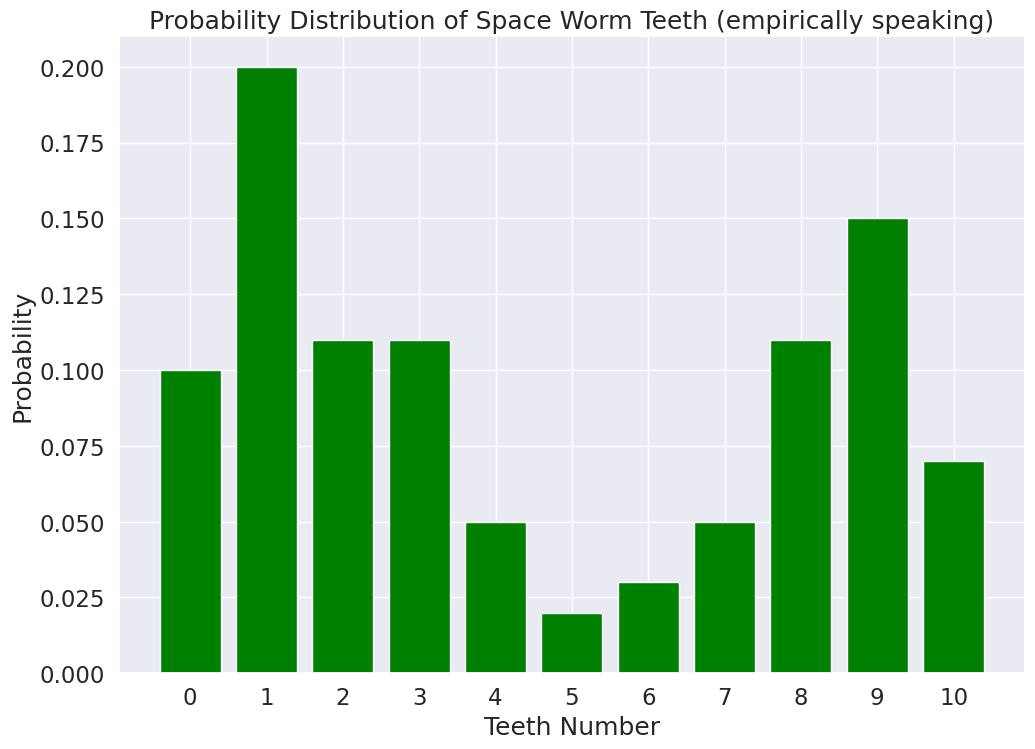

In [6]:
plt.figure()
plt.bar(index, true_data, color = 'green')
plt.xlabel('Teeth Number')
plt.title('Probability Distribution of Space Worm Teeth (empirically speaking)')
plt.ylabel('Probability')
plt.xticks(index)
plt.show()

While this data is great, we have a bit of a problem. We're far from Earth and sending data back home is expensive. What we want to do is reduce this data to a simple model with just one or two parameters. One option is to represent the distribution of teeth in worms as just a uniform distribution. We know there are 11 possible values and we can just assign the uniform probability of 1/11 to each of these possibilities.

## Hypothesis about the data

In [7]:
# uniform hypothesis samples
uniform_data = torch.full((n, ), 1.0 / n)
print('n =', n)

n = 11


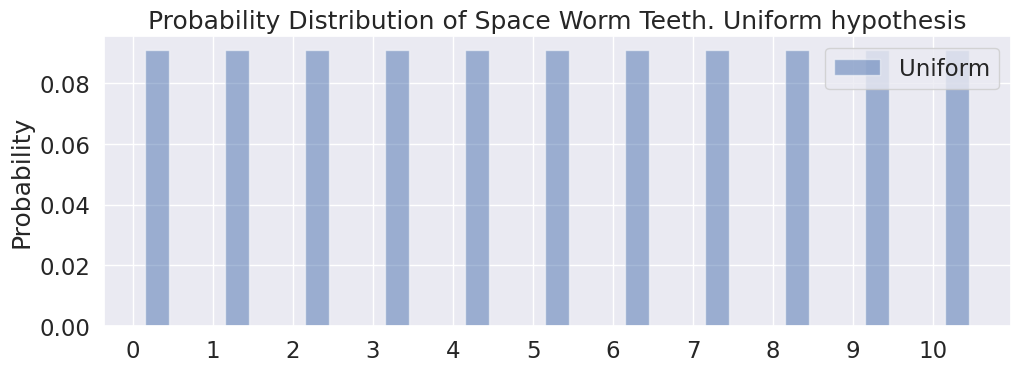

In [8]:
# Uniform hypothesis
width = 0.3
plt.subplot(211)
# we can plot our approximated distribution against the original distribution
plt.bar(index + width, uniform_data, width=width, label='Uniform', alpha=0.5)
plt.title('Probability Distribution of Space Worm Teeth. Uniform hypothesis')
plt.ylabel('Probability')
plt.xticks(index)
plt.legend()
plt.show()

Clearly our data is not uniformly distributed, but it also doesn't look too much like any common distributions we know. Another option we could try would be to model our data using the Binomial distribution. In this case all we need to do is estimate that probability parameter of the Binomial distribution. We know that if we have
n
n trials and a probabily is
p
p then the expectation is just
E
[
x
]
=
n
⋅
p
E[x]=n⋅p. In this case
n
=
1
0
n=10, and the expectation is just the mean of our data, which we'll say is 5.7, so our best estimate of p is 0.57. That would give us a binomal distribution that looks like this:

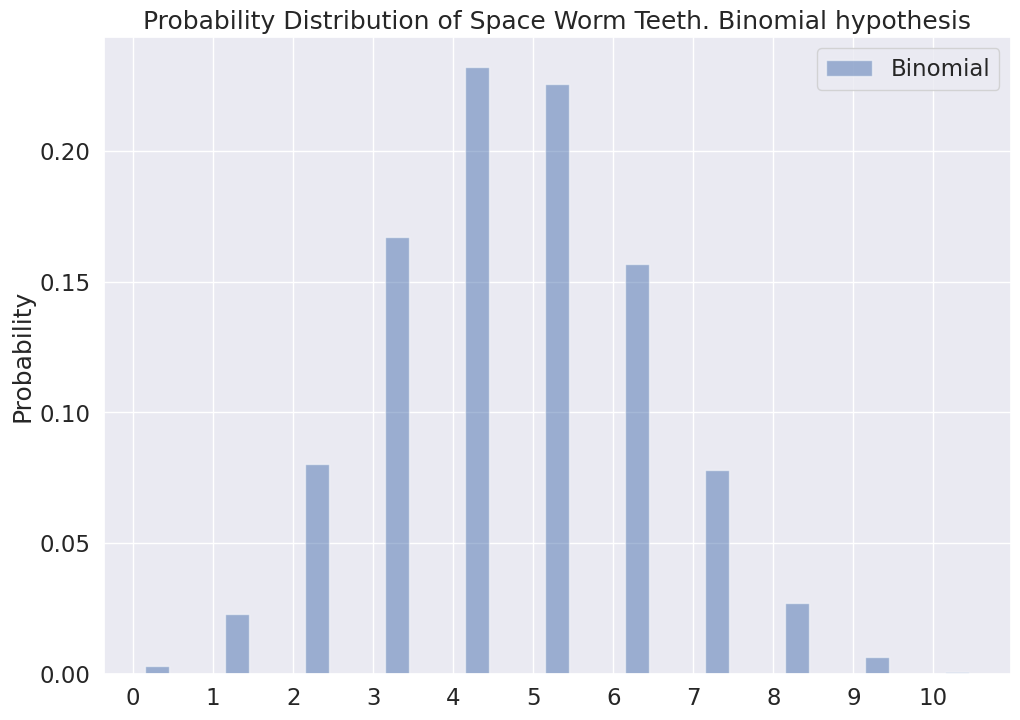

In [9]:
# binomial hypothesis samples
p = true_data.dot(index) / n
binomial_dist = distrs.Binomial(total_count=n, probs=p)
binom_data = binomial_dist.log_prob(index).exp()
width = 0.3

plt.bar(index + width, binom_data, width=width, label='Binomial', alpha=0.5)
plt.title('Probability Distribution of Space Worm Teeth. Binomial hypothesis')
plt.ylabel('Probability')
plt.xticks(index)
plt.legend()
plt.show()

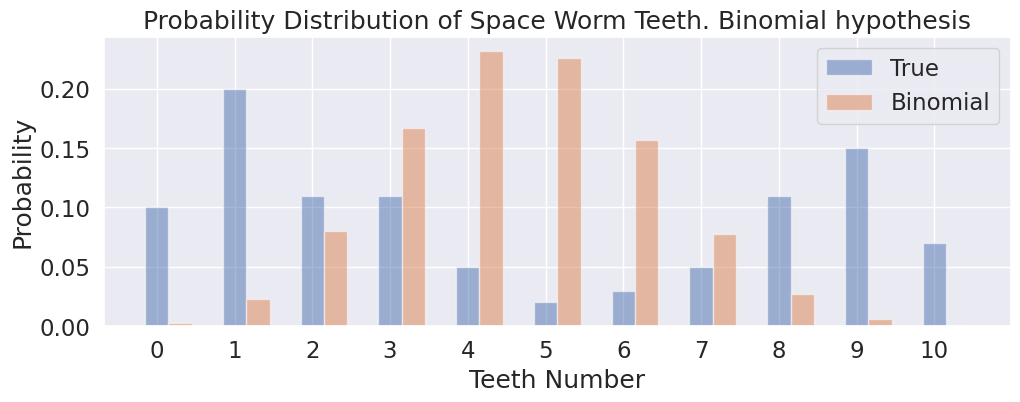

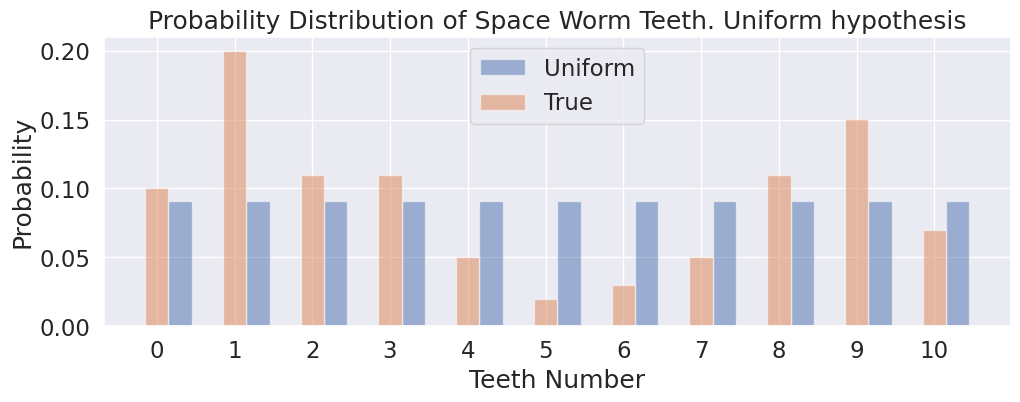

In [10]:
plt.subplot(211)
# we can plot our approximated distribution against the original distribution
plt.bar(index ,         true_data, width=width, label='True', alpha=0.5)
plt.bar(index + width, binom_data, width=width, label='Binomial', alpha=0.5)
plt.xlabel('Teeth Number')
plt.title('Probability Distribution of Space Worm Teeth. Binomial hypothesis')
plt.ylabel('Probability')
plt.xticks(index)
plt.legend()
plt.show()


plt.subplot(211)
# we can plot our approximated distribution against the original distribution
plt.bar(index + width, uniform_data, width=width, label='Uniform', alpha=0.5)
plt.bar(index ,         true_data, width=width, label='True', alpha=0.5)
plt.xlabel('Teeth Number')
plt.title('Probability Distribution of Space Worm Teeth. Uniform hypothesis')
plt.ylabel('Probability')
plt.xticks(index)
plt.legend()
plt.show()

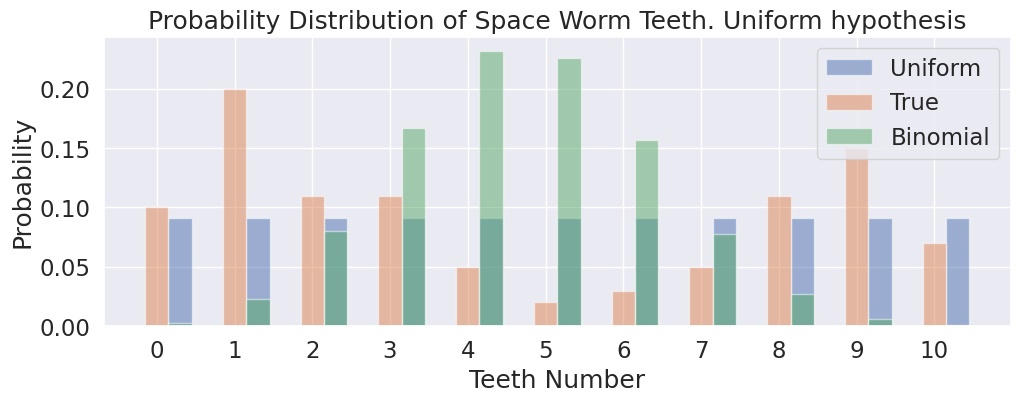

In [11]:
plt.subplot(211)
# we can plot our approximated distribution against the original distribution
plt.bar(index + width, uniform_data, width=width, label='Uniform', alpha=0.5)
plt.bar(index ,         true_data, width=width, label='True', alpha=0.5)
plt.bar(index + width, binom_data, width=width, label='Binomial', alpha=0.5)
plt.xlabel('Teeth Number')
plt.title('Probability Distribution of Space Worm Teeth. Uniform hypothesis')
plt.ylabel('Probability')
plt.xticks(index)
plt.legend()
plt.show()

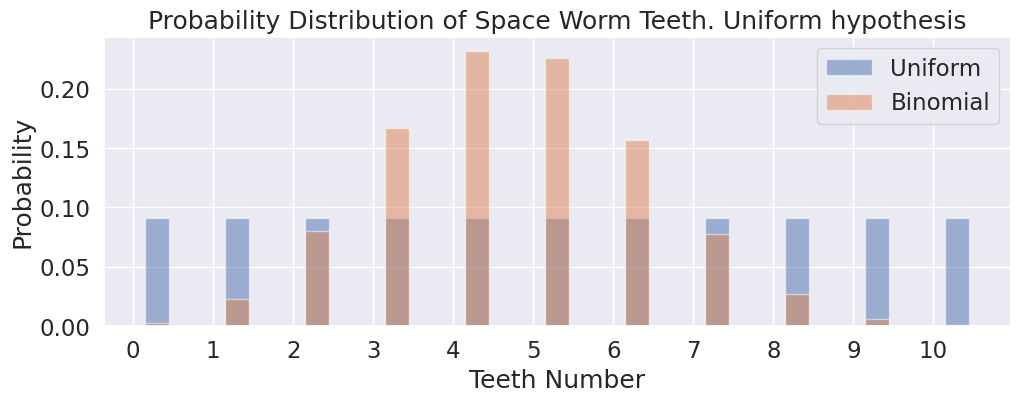

In [12]:
plt.subplot(211)
# we can plot our approximated distribution against the original distribution
plt.bar(index + width, uniform_data, width=width, label='Uniform', alpha=0.5)
plt.bar(index + width, binom_data, width=width, label='Binomial', alpha=0.5)
plt.xlabel('Teeth Number')
plt.title('Probability Distribution of Space Worm Teeth. Uniform hypothesis')
plt.ylabel('Probability')
plt.xticks(index)
plt.legend()
plt.show()

In [ ]:
result = {}

Comparing each of our models with our original data we can see that neither one is the perfect match, but which one is better?

## Total variation distance
$$TVD(P||Q)=\sup_{x\in\Omega}|p(x)-q(x)|$$

In [ ]:
def compute_tv_distance(p_probs: torch.Tensor, q_probs: torch.Tensor):
    ??? # YOUR CODE HERE

In [ ]:
true_data_testing = torch.tensor([0.1, 0.2, 0.11, 0.11, 0.05, 0.02, 0.03, 0.05, 0.11, 0.15, 0.07])
uniform_data_testing = torch.full((n, ), 1.0 / n)
binomial_dist = distrs.Binomial(total_count=n, probs=true_data.dot(index) / n).log_prob(index).exp()

print('TVD(True||Uniform): ', compute_tv_distance(true_data, uniform_data))
print('TVD(Uniform||True): ', compute_tv_distance(uniform_data, true_data))
print('TVD(True||Binomial): ', compute_tv_distance(true_data, binom_data))
print('TVD(Binomial||True): ', compute_tv_distance(binom_data, true_data))

TVD(True||Uniform):  tensor(0.1091)
TVD(Uniform||True):  tensor(0.1091)
TVD(True||Binomial):  tensor(0.2058)
TVD(Binomial||True):  tensor(0.2058)


In [ ]:
## GRADED PART, DO NOT CHANGE!
grader.set_answer(parts[0], [
                             compute_tv_distance(true_data, uniform_data).item(),
                             compute_tv_distance(uniform_data, true_data).item(),
                             compute_tv_distance(true_data, binom_data).item(),
                             compute_tv_distance(binom_data, true_data).item()
])

In [ ]:
result['Tdv'] = [compute_tv_distance(true_data, uniform_data)
, compute_tv_distance(uniform_data, true_data)
, compute_tv_distance(true_data, binom_data)
, compute_tv_distance(binom_data, true_data)]

## KL divergence
$$KL ( P||Q ) = \int_{\mathbb{R}^n}p(x)\log\left( \frac{p(x)}{q_{\theta}(x)}\right) dx$$

There are plenty of existing error metrics, but our primary concern is with minimizing the amount of information we have to send. Both of these models reduce our problem to two parameters, number teeth and a probability (though we really only need the number of teeth for the uniform distribution). The best test of which is better is to ask which distribution preserves the most information from our original data source. This is where Kullback-Leibler Divergence comes in.

In [ ]:
# Implement KL divergence below
def compute_kl_divergence(p_probs: torch.Tensor, q_probs: torch.Tensor):
    """"
    KL (P || Q) = \int_{R^n}p(x)\log\left( \frac{p(x)}{q_{\theta}(x)}\right) =
                = \sum_i p_i log(p_i / q_i)

    Note:
        1. The output -- kl_div -- should be one number that is equal to KL (P || Q)
        2. Do not forget to clamp your probabilities to avoid log(0) and (x / 0) problems!
    """
    EPS = 1e-7
    ???  # YOUR CODE HERE
    kl_div = ???  # YOUR CODE HERE
    return kl_div

In [ ]:
true_data_testing = torch.tensor([0.1, 0.2, 0.11, 0.11, 0.05, 0.02, 0.03, 0.05, 0.11, 0.15, 0.07])
uniform_data_testing = torch.full((n, ), 1.0 / n)
binomial_dist = distrs.Binomial(total_count=n, probs=true_data.dot(index) / n).log_prob(index).exp()


print('KL(True||Uniform): ', compute_kl_divergence(true_data, uniform_data))
print('KL(Uniform||True): ', compute_kl_divergence(uniform_data, true_data))
print('KL(True||Binomial): ', compute_kl_divergence(true_data, binom_data))
print('KL(Binomial||True): ', compute_kl_divergence(binom_data, true_data))

KL(True||Uniform):  tensor(0.1636)
KL(Uniform||True):  tensor(0.1930)
KL(True||Binomial):  tensor(1.5118)
KL(Binomial||True):  tensor(1.1198)


In [ ]:
result['KL'] = [compute_kl_divergence(true_data, uniform_data)
, compute_kl_divergence(uniform_data, true_data)
, compute_kl_divergence(true_data, binom_data)
, compute_kl_divergence(binom_data, true_data)]

In [ ]:
## GRADED PART, DO NOT CHANGE!
grader.set_answer(parts[1], [
                             compute_kl_divergence(true_data, uniform_data).item(),
                             compute_kl_divergence(uniform_data, true_data).item(),
                             compute_kl_divergence(true_data, binom_data).item(),
                             compute_kl_divergence(binom_data, true_data).item()
])

In [ ]:
# check yourself with scipy
# examples https://www.statology.org/kl-divergence-python/

from scipy.special import rel_entr
#sum(rel_entr(true_data, uniform_data))

print('KL(True||Uniform): ', sum(rel_entr(true_data, uniform_data)))
print('KL(Uniform||True): ', sum(rel_entr(uniform_data, true_data)))
print('KL(True||Binomial): ', sum(rel_entr(true_data, binom_data)))
print('KL(Binomial||True): ', sum(rel_entr(binom_data, true_data)))

In [ ]:
result['KL_orig'] = [sum(rel_entr(true_data, uniform_data))
, sum(rel_entr(uniform_data, true_data))
, sum(rel_entr(true_data, binom_data))
, sum(rel_entr(binom_data, true_data))]

## Jensen–Shannon divergence
$$JS ( P||Q ) = \frac{KL ( P||Q ) + KL ( Q||P )}{2}$$

In [28]:
# Implement JS divergence below
def compute_js_divergence(p_probs: torch.Tensor, q_probs: torch.Tensor):
    js_div = ???  # YOUR CODE HERE
    return js_div

SyntaxError: ignored

In [29]:
true_data_testing = torch.tensor([0.1, 0.2, 0.11, 0.11, 0.05, 0.02, 0.03, 0.05, 0.11, 0.15, 0.07])
uniform_data_testing = torch.full((n, ), 1.0 / n)
binomial_dist = distrs.Binomial(total_count=n, probs=true_data.dot(index) / n).log_prob(index).exp()


print('JS(True||Uniform): ', compute_js_divergence(true_data, uniform_data))
print('JS(Uniform||True): ', compute_js_divergence(uniform_data, true_data))
print('JS(True||Binomial): ', compute_js_divergence(true_data, binom_data))
print('JS(Binomial||True): ', compute_js_divergence(binom_data, true_data))

NameError: ignored

In [ ]:
result['JS'] = [compute_js_divergence(true_data, uniform_data)
, compute_js_divergence(uniform_data, true_data)
, compute_js_divergence(true_data, binom_data)
, compute_js_divergence(binom_data, true_data)]

In [ ]:
## GRADED PART, DO NOT CHANGE!
grader.set_answer(parts[2], [
                             compute_js_divergence(true_data, uniform_data).item(),
                             compute_js_divergence(uniform_data, true_data).item(),
                             compute_js_divergence(true_data, binom_data).item(),
                             compute_js_divergence(binom_data, true_data).item()
])

In [ ]:
# Check yourself with scipy function

from scipy.spatial import distance


print('JS(True||Uniform): ', distance.jensenshannon(true_data, uniform_data))
print('JS(Uniform||True): ', distance.jensenshannon(uniform_data, true_data))
print('JS(True||Binomial): ', distance.jensenshannon(true_data, binom_data))
print('JS(Binomial||True): ', distance.jensenshannon(binom_data, true_data))

In [ ]:
result['JS_orig'] = [pow(distance.jensenshannon(true_data, uniform_data),2)
, pow(distance.jensenshannon(uniform_data, true_data),2)
, pow(distance.jensenshannon(true_data, binom_data),2)
, pow(distance.jensenshannon(binom_data, true_data),2)]

In [ ]:
grader.submit(COURSERA_EMAIL, COURSERA_TOKEN)

Submitted to Coursera platform. See results on assignment page!


In [ ]:
result['W'] = [wasserstein_distance_for_pdf(true_data, uniform_data)
, wasserstein_distance_for_pdf(uniform_data, true_data)
, wasserstein_distance_for_pdf(true_data, binom_data)
, wasserstein_distance_for_pdf(binom_data, true_data)]

#Results

Please write your conclusion

In [ ]:
result

Conclusion :